# Linear Regression

### Gradient Descent

Taken from [here](https://scipython.com/blog/visualizing-the-gradient-descent-method/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

### One Parameter

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


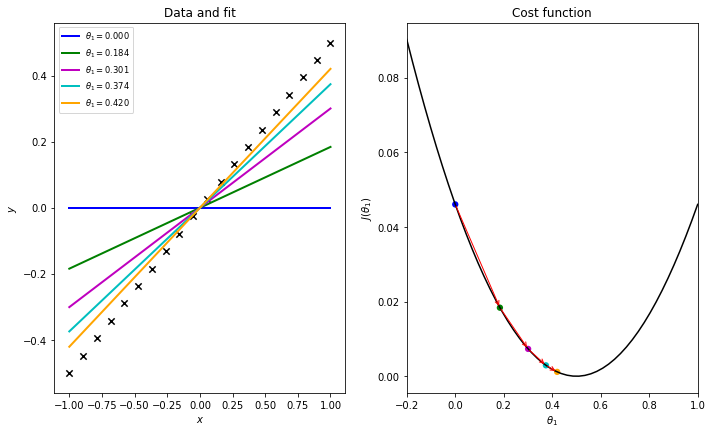

In [2]:
# The data to fit
m = 20.
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1.
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum((hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]), arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

### Two Parameters

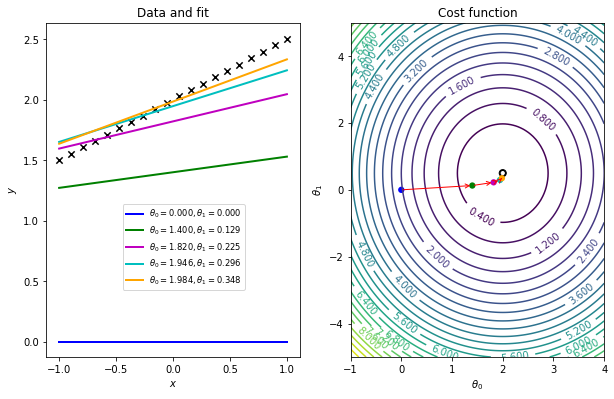

In [3]:
# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

---

### Closed Form Solution

\begin{equation}
       \theta = (X^T X)^{-1} X^T Y 
\end{equation} 

In [4]:
x = np.linspace(-5,5,11).reshape(1,11).T
y = x + np.random.normal(size=x.shape)

In [5]:
plt.grid()
plt.scatter(x,y)

\begin{equation}
       A = X^T X
\end{equation}

In [6]:
A = np.matmul(x.T, x)

\begin{equation}
       B = (A)^{-1}
\end{equation}

In [7]:
B = np.linalg.inv(A)

\begin{equation}
       C = B X^T 
\end{equation}

In [8]:
C = np.matmul(B, x.T)

\begin{equation}
       \theta = C Y 
\end{equation}

In [9]:
theta = np.matmul(C, y)

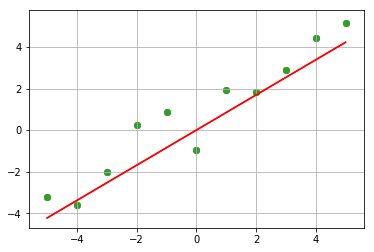

In [11]:
plt.grid()
plt.plot(x, theta*x, color='r')
plt.scatter(x,y)
plt.show()
None